In [40]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def mandelbrot():
    max_iterations = 100
    z_num = 60000 # needs to be divisible by 2/3 and produce a perfect square

    zi = np.zeros(z_num, dtype=complex)
    iterations = np.zeros(z_num, dtype=int)
    
    mandelbrot_map = lambda c: lambda z: z**2 + c
    
    q_p_ratio = 2/3
    p_num = int(np.sqrt(z_num / q_p_ratio))
    q_num = int(q_p_ratio * p_num)
    
    c = [p + q * 1j for q in np.linspace(-1, 1, q_num)
                    for p in np.linspace(-2, 1, p_num)]
    
    for i in range(max_iterations):
        mask = np.abs(zi) < 2
        
        zi[mask] = (zi ** 2 + c)[mask]
        zi[np.logical_not(mask)] = 2
        iterations[mask] = i + 1

    # q is y axis, p is x axis
    iterations = np.log(iterations) # use log color to make color differences clearer
    image = iterations.reshape(q_num, p_num)
        
    fig, ax = plt.subplots(figsize=(8, 12))
#     ax.axis('off')
    ax.imshow(image, cmap=plt.cm.get_cmap('magma_r'), extent=(-2, 1, -1, 1))

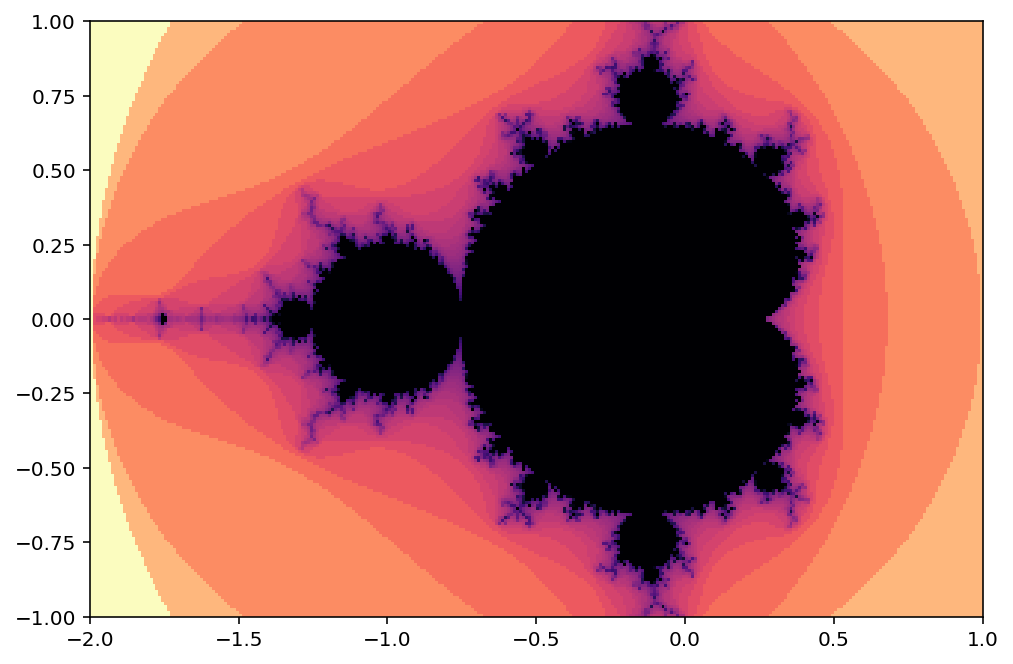

In [7]:
mandelbrot()

# np.array([1, 2, 3, 4, 5, 6]).reshape(2, 3)
# np.array([y + str(x) for y in ['a', 'b', 'c'] for x in range(4)]).reshape(3, 4)

In [8]:
def julia(c):
    max_iterations = 100
    radius = 0.5 * (1 + np.sqrt(1 + 4 * np.abs(c)))
    
    map_fn = lambda z: z**2 + c

    p_num = 500
    q_num = 500
    ratio = p_num / q_num
    
    z_num = p_num * q_num
    
    zi = np.array([p + q * 1j for q in np.linspace(-1.3, 1.3, q_num)
                              for p in np.linspace(-1.3, 1.3, p_num)])
    
    iterations = np.zeros(z_num, dtype=int)
    
    for i in range(max_iterations):
        mask = np.abs(zi) < radius
        
        zi[mask] = (zi ** 2 + c)[mask]
        zi[np.logical_not(mask)] = radius
        iterations[mask] = i + 1
    
    image = np.log(iterations.reshape(q_num, p_num) + 1)
    
    fig, ax = plt.subplots(figsize=(8 * ratio, 8))
    ax.imshow(image, cmap=plt.cm.get_cmap('magma_r'), extent=(-1.3, 1.3, -1.3, 1.3))

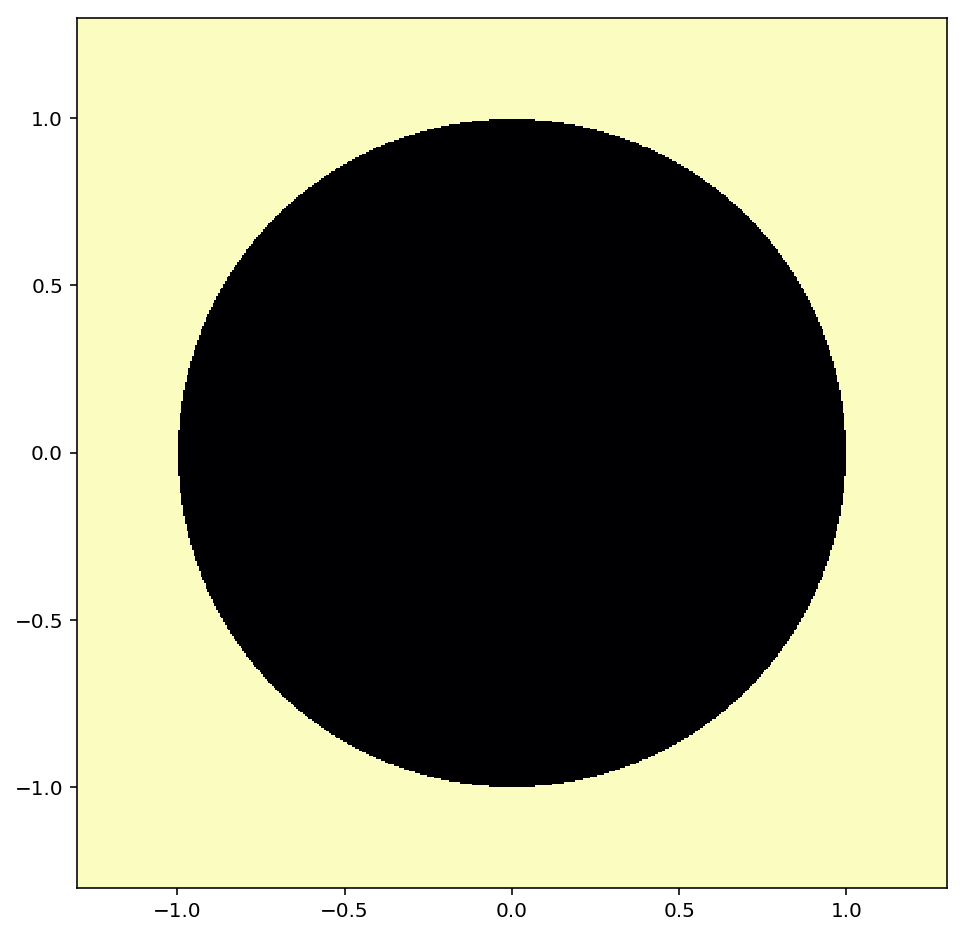

In [9]:
julia(0)

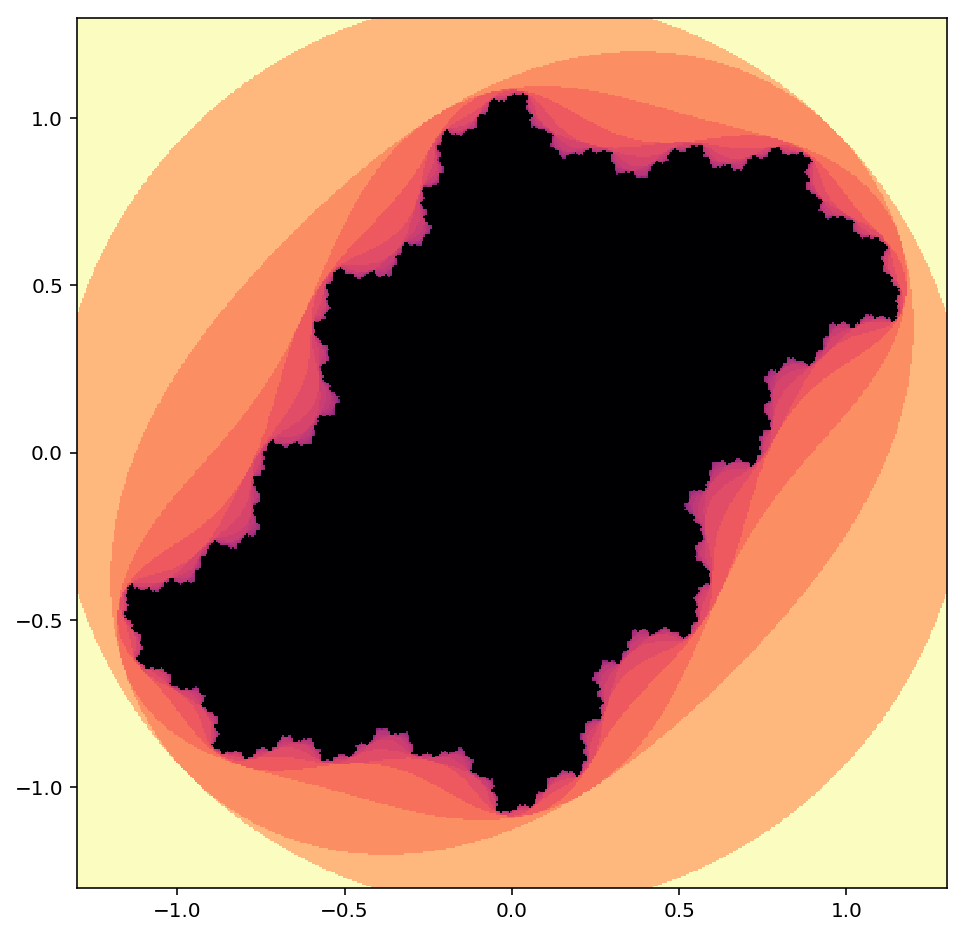

In [10]:
julia(0.5j)

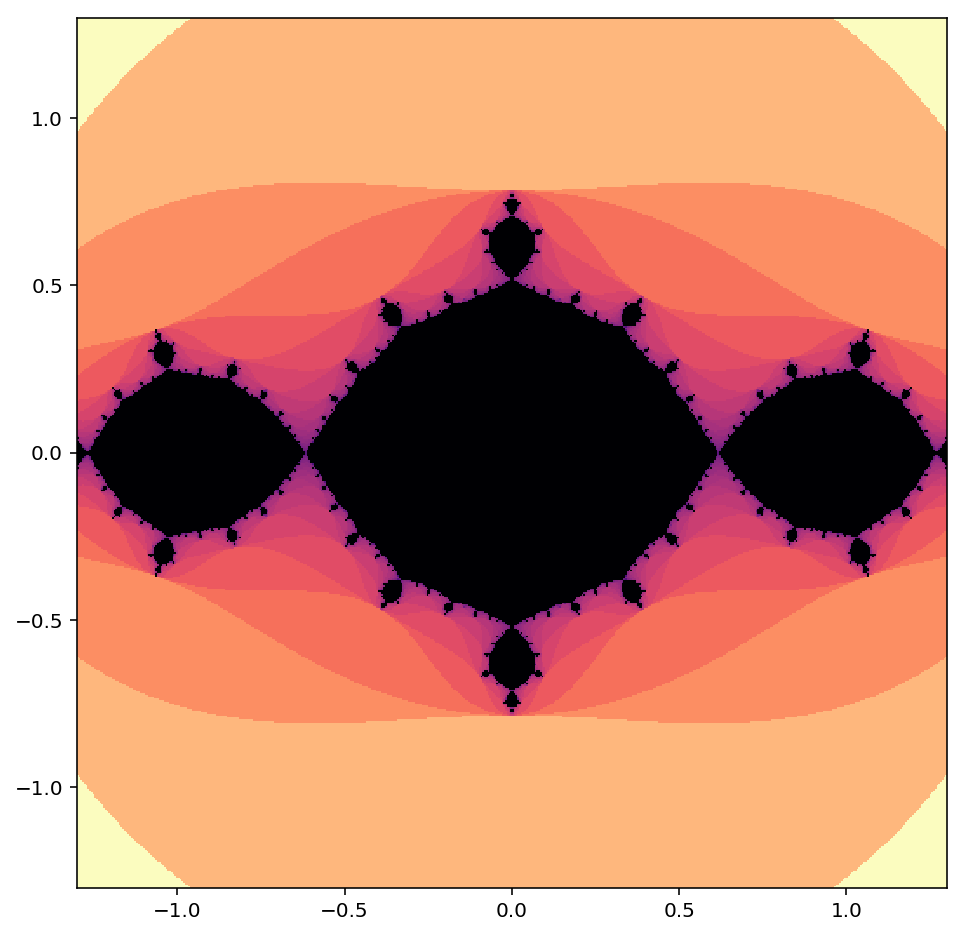

In [11]:
julia(-1)

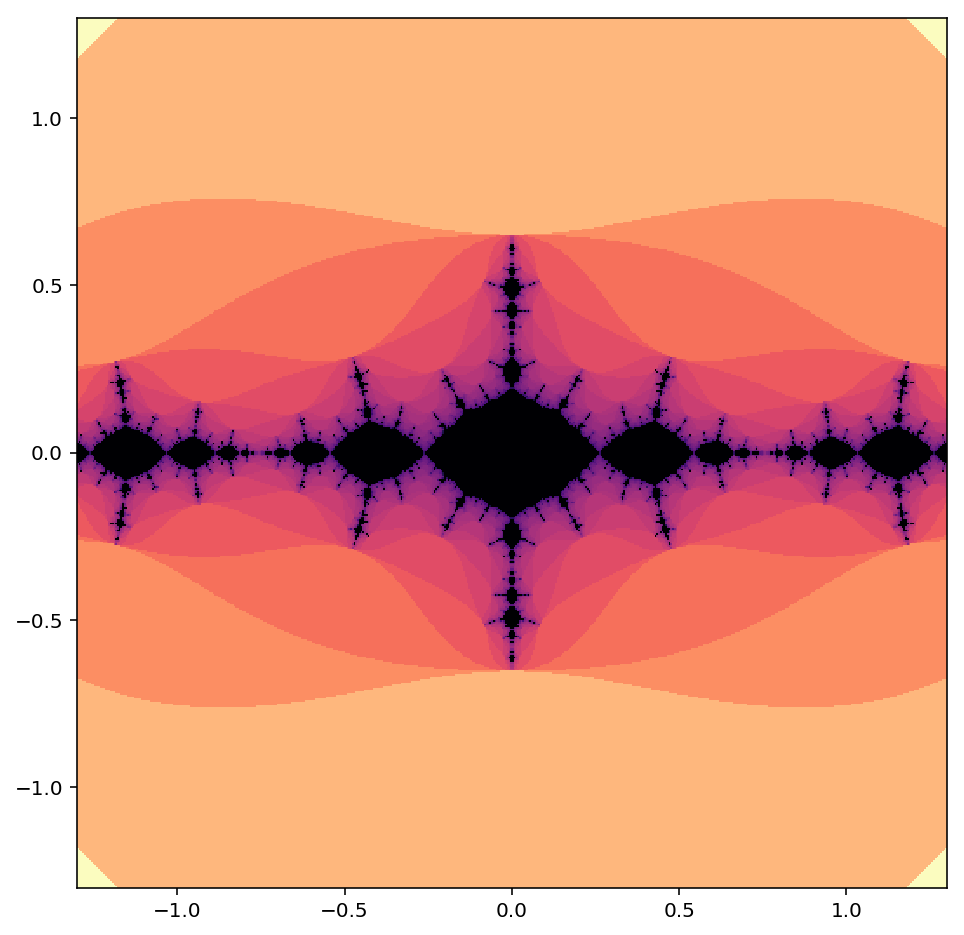

In [12]:
julia(-1.33)

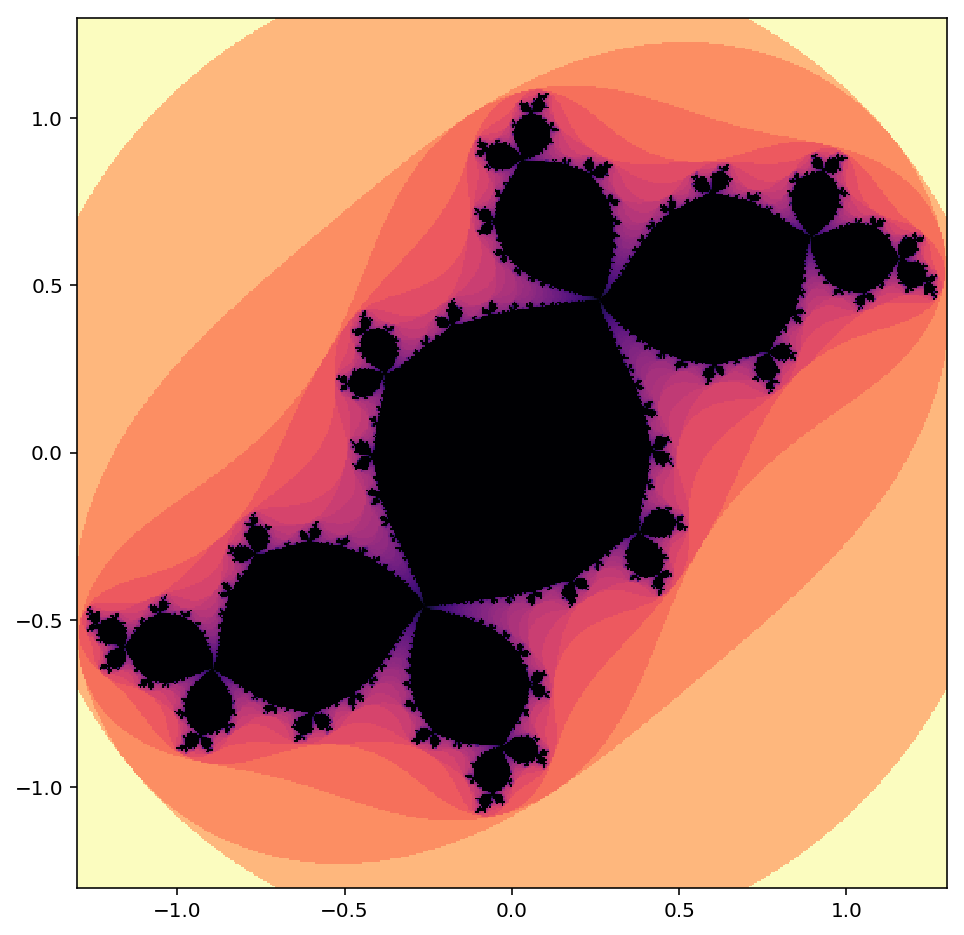

In [13]:
julia(-.12 + 0.7j)

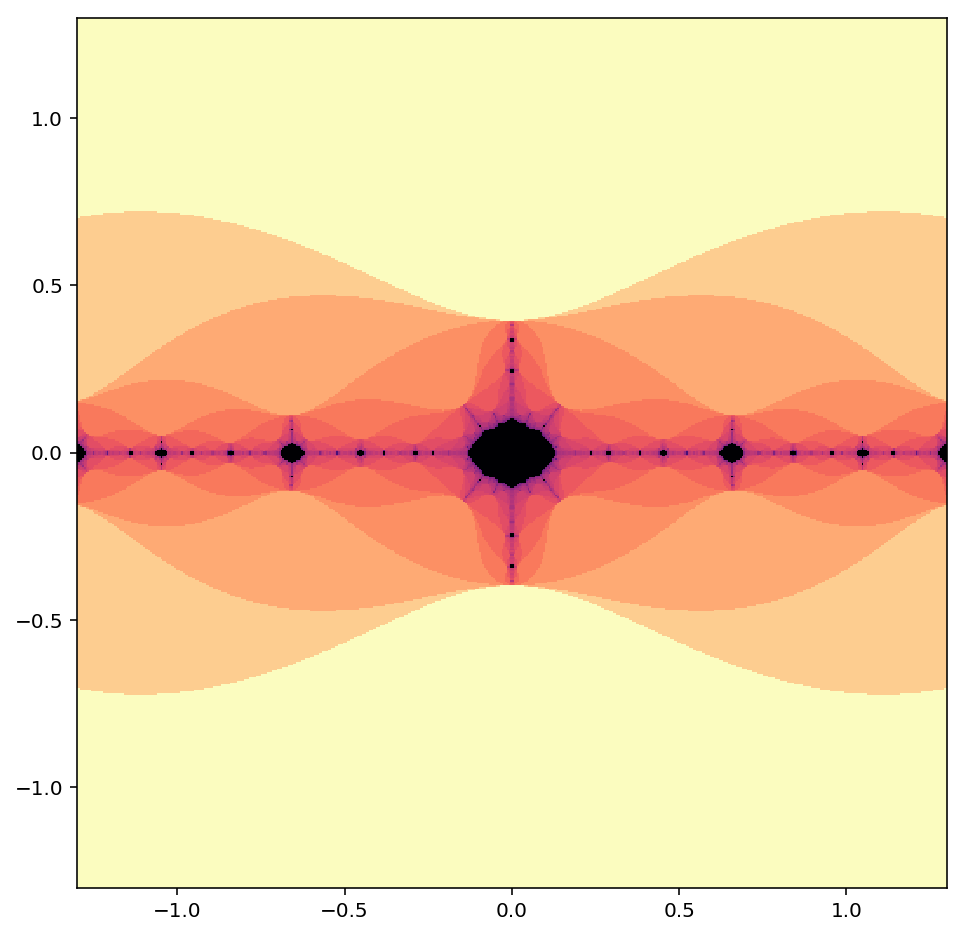

In [14]:
julia(-1.76)

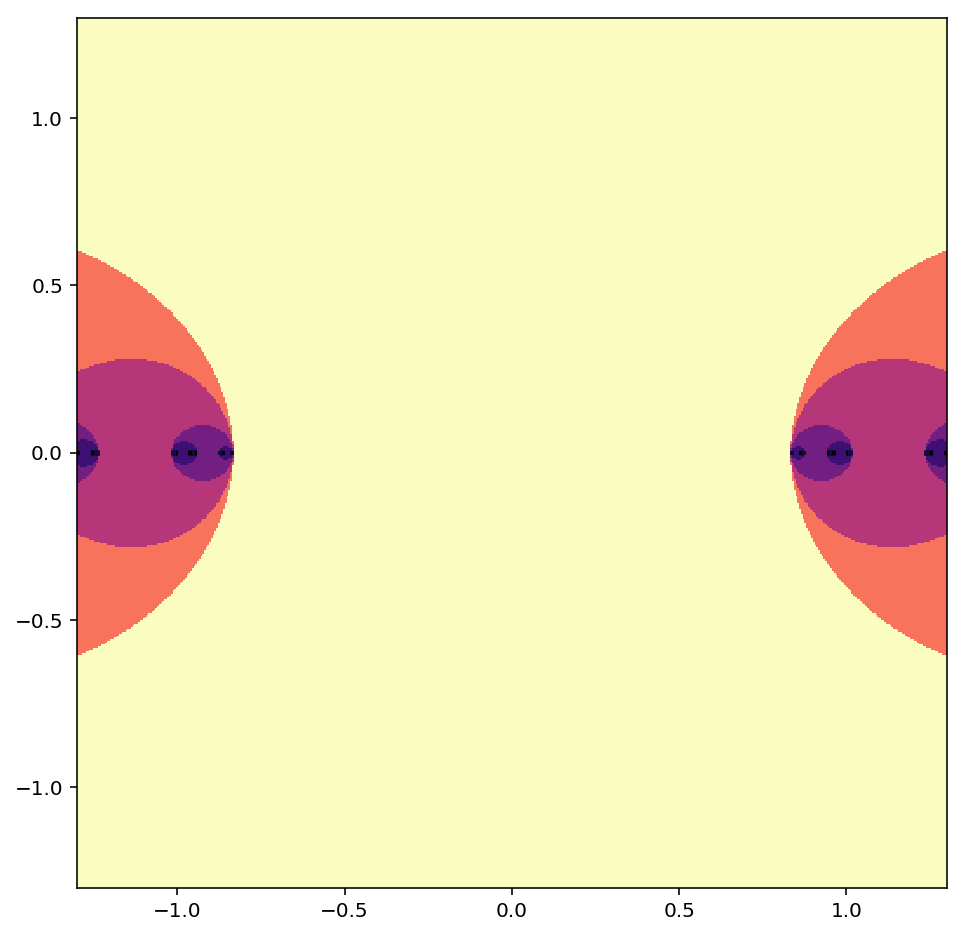

In [15]:
julia(-3)

In [38]:
def iterate_map(f, x_0, n):
    trajectory = np.zeros(n + 1, dtype=complex)
    trajectory[0] = x_0
    for i in range(1, n + 1):
        trajectory[i] = f(trajectory[i-1])
    
    return trajectory

def part_2_problem_3(c):
    map_fn = lambda z: z**2 + c
    
    z0 = 0j
    
    traj = iterate_map(map_fn, z0, 40)
    fig, ax = plt.subplots(figsize=(8, 8))
    
#     ax.plot(traj.real, traj.imag, 'o', markersize=1)
    ax.scatter(traj.real, traj.imag)

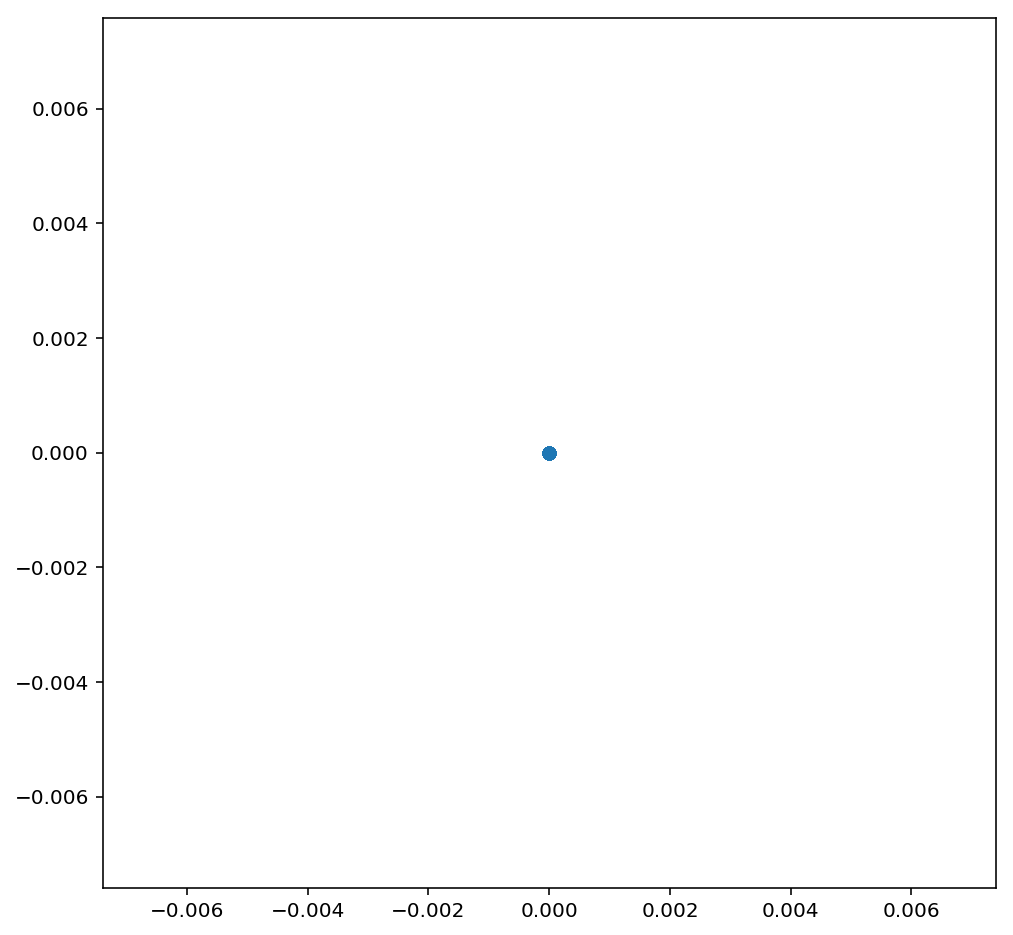

In [41]:
part_2_problem_3(0)

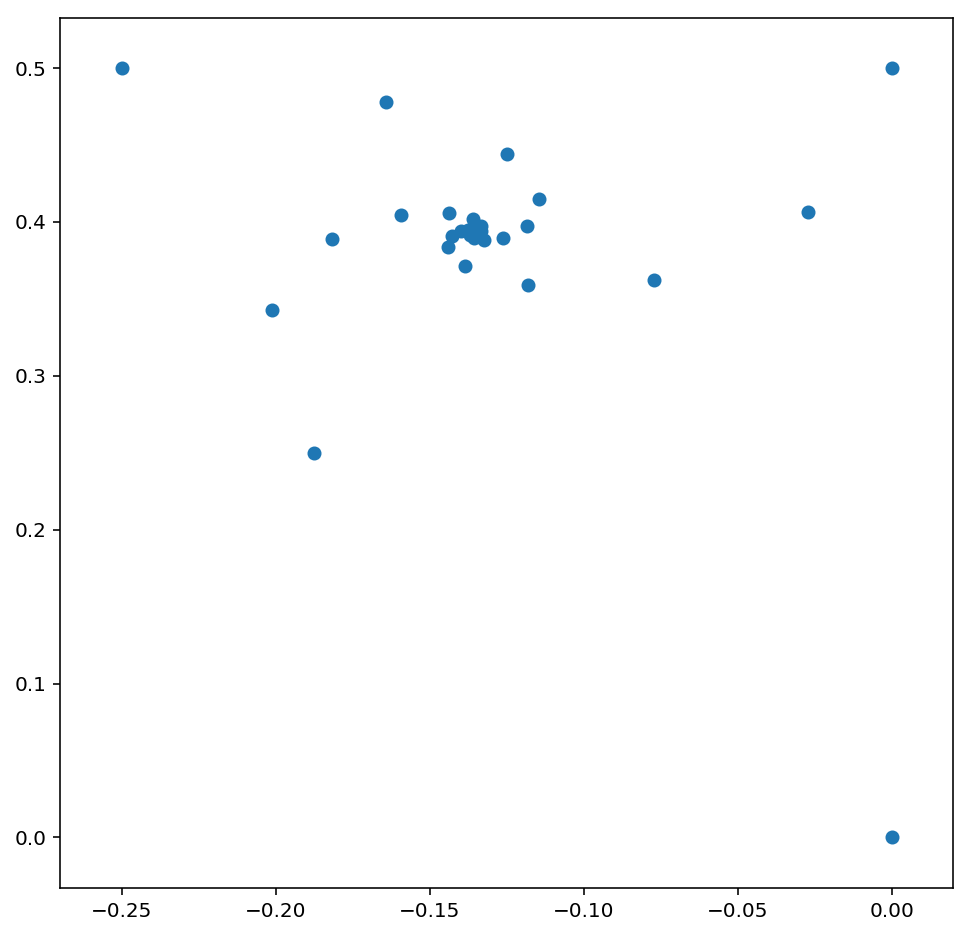

In [42]:
part_2_problem_3(0.5j)

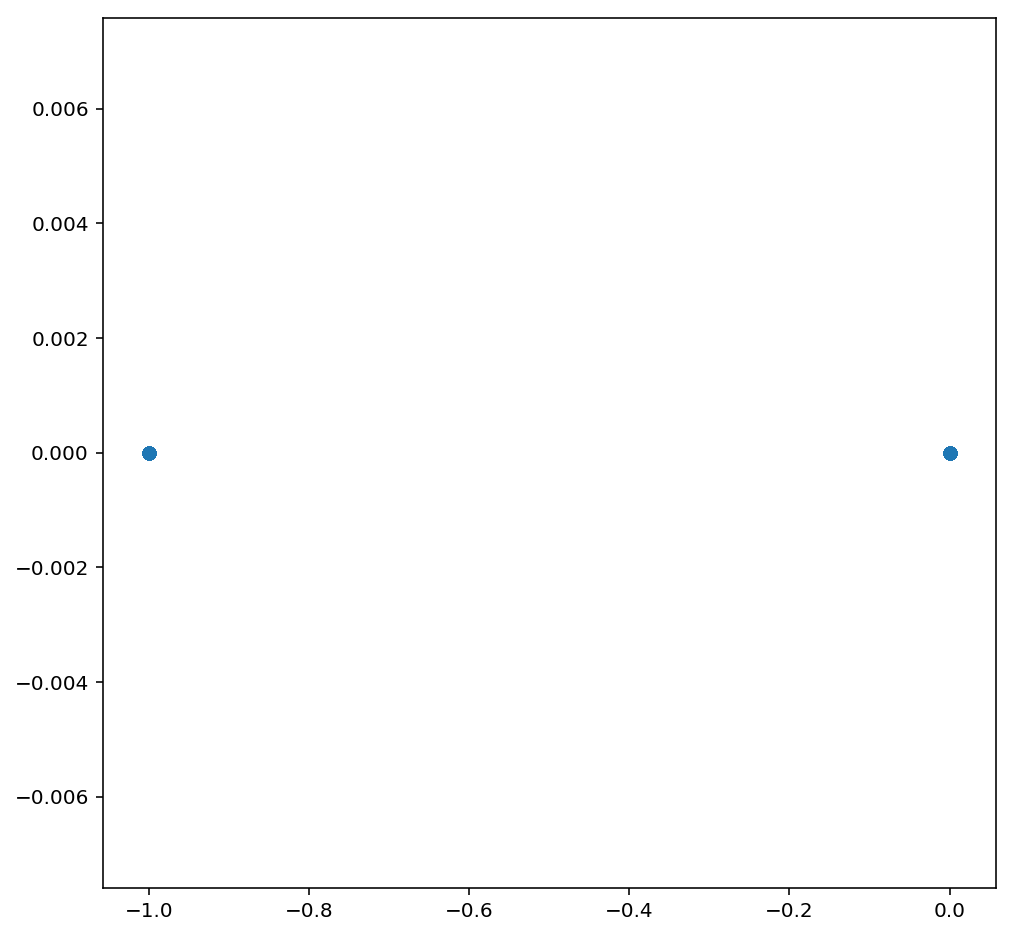

In [43]:
part_2_problem_3(-1)

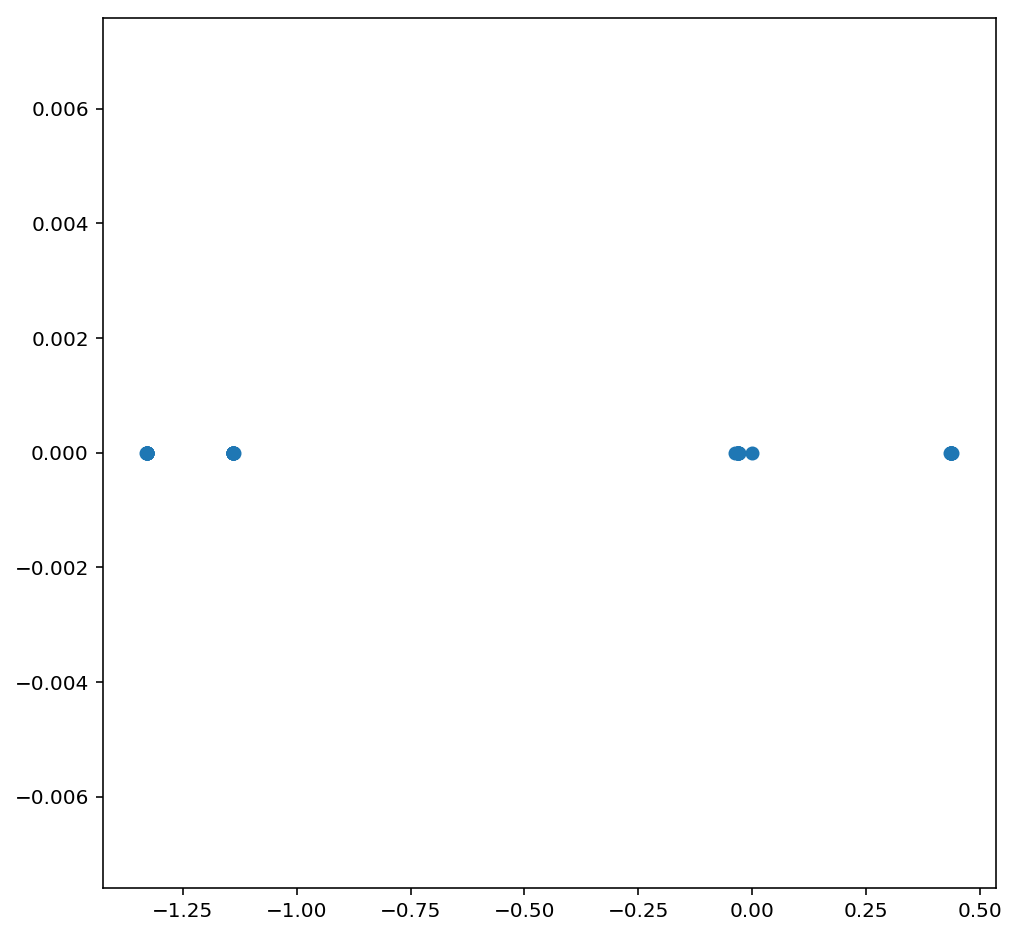

In [44]:
part_2_problem_3(-1.33)

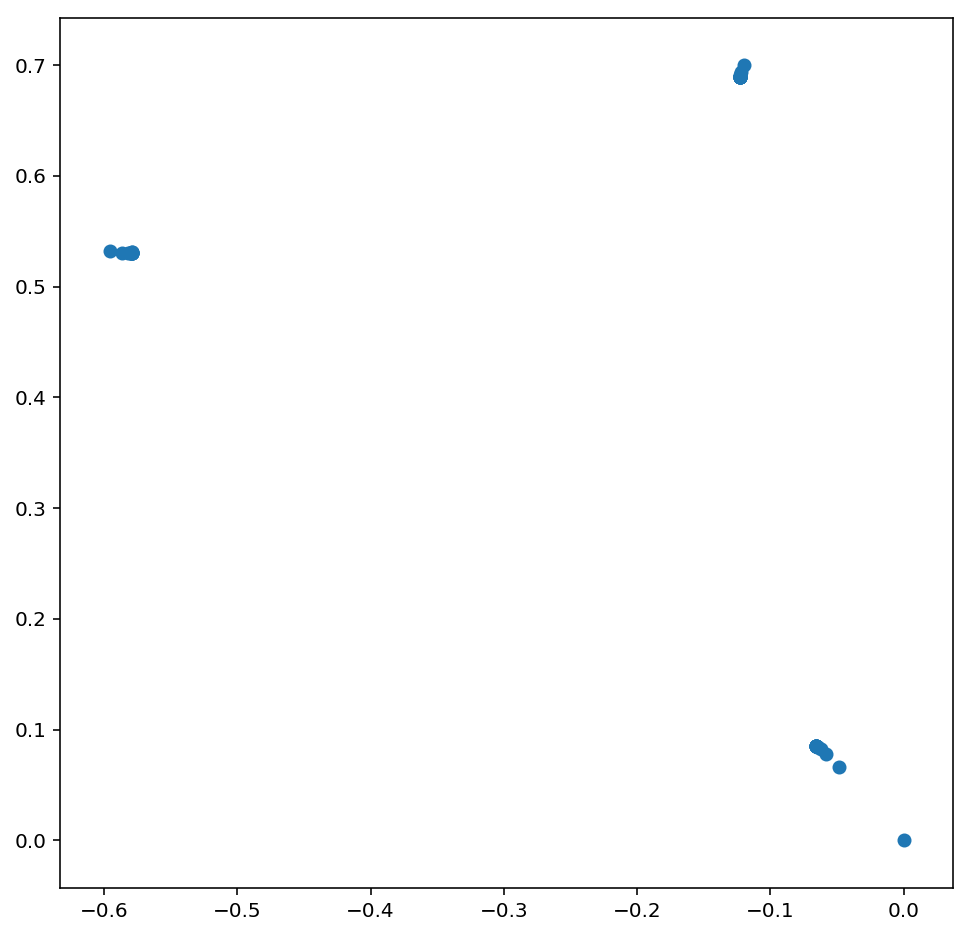

In [45]:
part_2_problem_3(-.12 + 0.7j)

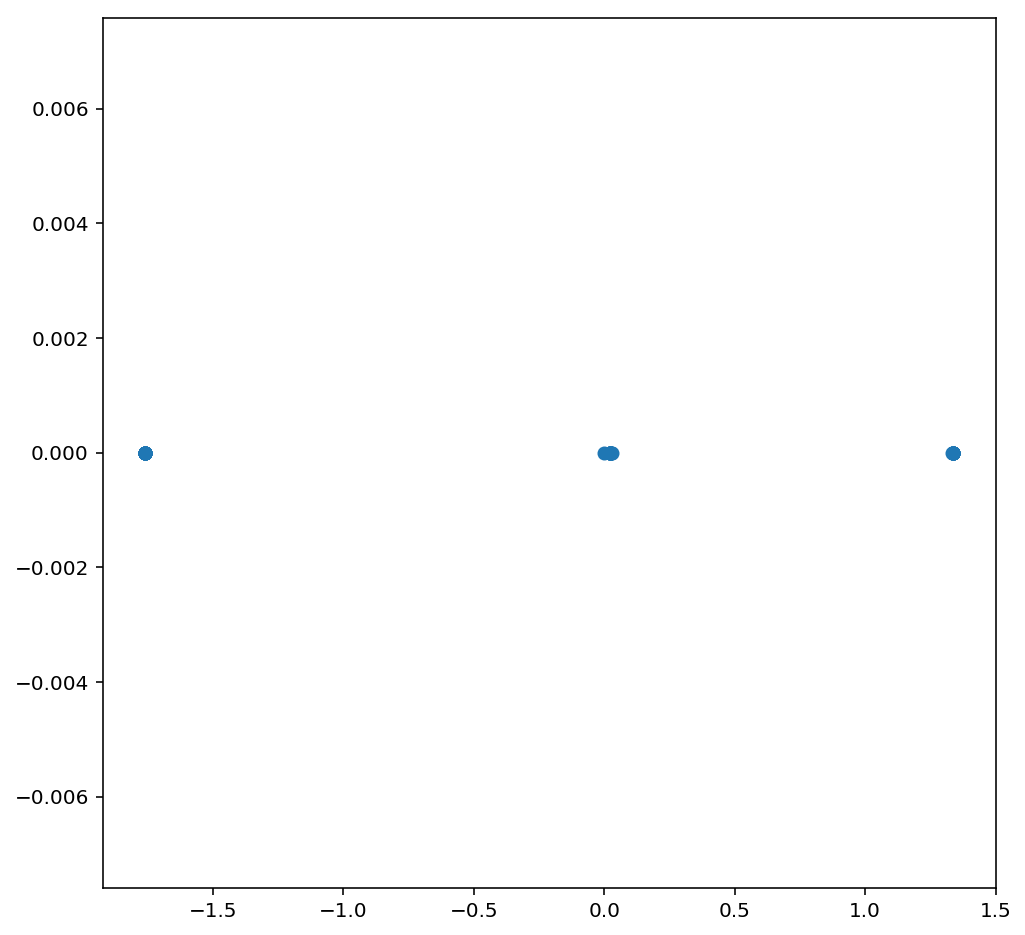

In [46]:
part_2_problem_3(-1.76)

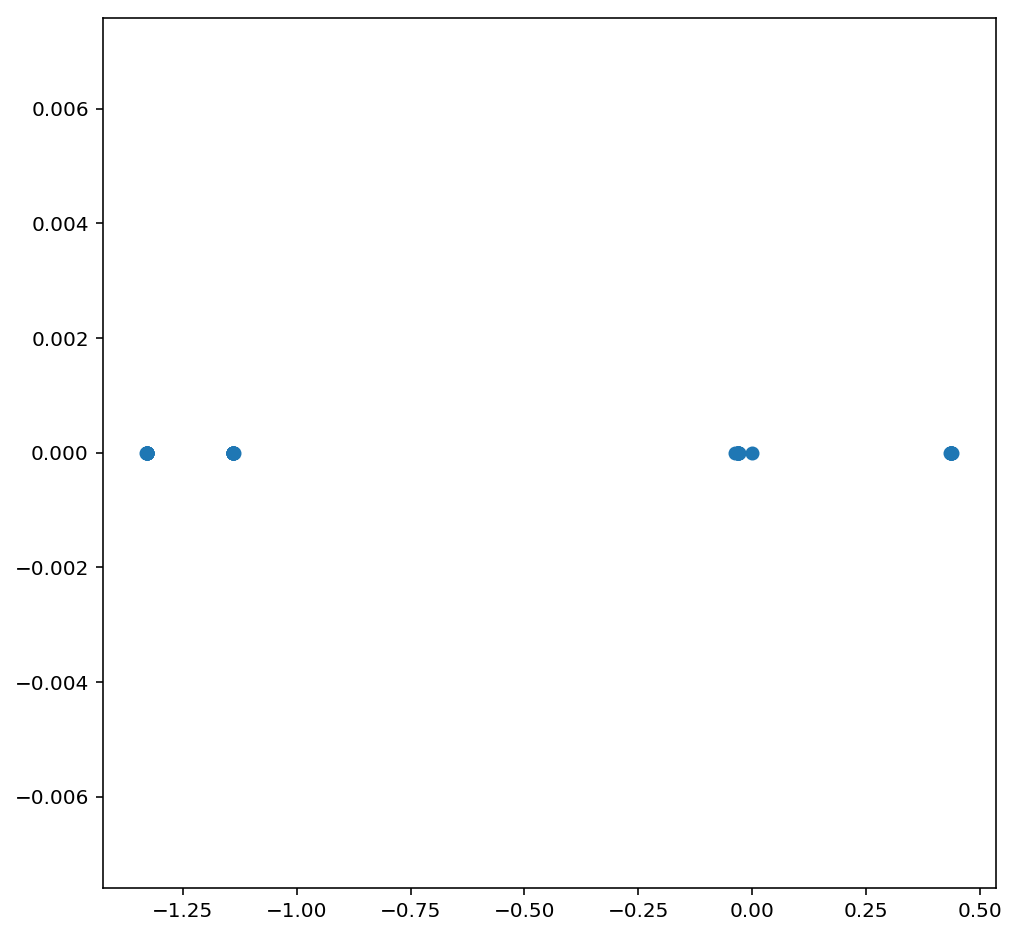

In [47]:
part_2_problem_3(-1.33)

In [24]:
def get_unique(arr, thres=0.00001):
    unique = []
    
    for element in arr:
        for x in unique:
            if np.abs(x - element) <= thres:
                break
        else:
            unique.append(element)
    
    return unique

def check_periodic(c, period=6):
    fn = lambda z: z**2 + c
    
    n = 10000
    z0 = 0j
    
    traj = np.zeros(n + 1, dtype=complex)
    traj[0] = z0
    for i in range(1, n + 1):
        if np.abs(traj[i-1]) < 10**200:
            traj[i] = fn(traj[i-1])
    
    print(traj[-(2 * period):])
    print(get_unique(traj[-(2 * period):]))
    print(len(get_unique(traj[-(2 * period):])))

In [25]:
check_periodic(-0.1+0.85j)

[-0.71245091+0.589451j    0.06013382+0.01009021j -0.09648574+0.85121353j
 -0.81525497+0.68574007j  0.09440122-0.268106j   -0.16296924+0.79938093j
 -0.71245091+0.589451j    0.06013382+0.01009021j -0.09648574+0.85121353j
 -0.81525497+0.68574007j  0.09440122-0.268106j   -0.16296924+0.79938093j]
[(-0.7124509050214675+0.5894509960656322j), (0.06013381530314202+0.010090208774469756j), (-0.0964857365702+0.8512135255016282j), (-0.815254968635417+0.6857400720269173j), (0.09440121750125299-0.26810600182470623j), (-0.16296923834871052+0.7993809340167092j)]
6


In [26]:
print(-0.1+0.85j)

(-0.1+0.85j)


In [35]:
import numpy as np

# Problem 3
def compute_box_counting(R, r=10**12):
    return np.log(len(np.unique(np.floor(R * r)))) / np.log(r)

In [37]:
R_harmonic = np.array([1/n for n in range(1, 10**6)])
R_power = np.array([1/(2**n) for n in range(0, 10**3)])
print("counting...")
print(compute_box_counting(R_harmonic))

counting...
0.4999999638087751
